In [2]:
from IPython.display import Image

# Association Rule Mining On the NC Education Data Set

Using trends discovered in previous analyses, we ran association rule mining algorithms using the 'arules' package in R to see if we could gain any insights into potential causal relationships in the data. In order to do this, we took the simplest approach possible:

* For each explanatory variable of interest (listed below), we classified the observation as 'low' if it was below the median value, or 'high' if it was above the median value. 


* The response variable, SPG.Grade, was re-classified as 'Good' if the school's grade was an A or a B, 'Moderate' if the school's grade was a C, or 'Bad' if the school's grade was a D or an F.

The list of our explanatory variables are as follows:

* Black Male Ratio - Was the ratio of black males above the median value for all schools (0.09)?

* Hispanic Male Ratio - Was the ratio of hispanic males above the median value for all schools (0.06)?

* Short Suspensions Rank - Was the number of short suspensions above the median value for all schools (7.19)?

* Daily Attendance Rank - Was the daily attendance percentage above the median value for all schools (0.95)?

* InexperiencedTeachRatio - Was the ratio of teachers with 0-3 years of experience above the median value for all schools (0.21)?

* schoolSizeRank - Was the size of the student body above the median value for all schools (535)?

* SPG.Grade - The modified SPG.Grade (see above)


We recognize that our approach may be somewhat biased, as the median value for some of these variables may not represent a true median (for example, the median racial composition in urban areas vs. rural areas likely varies tremendously. Furthermore, calling attendance under 95% 'low' might be somewhat harsh, as values such as 93% or 94% are still pretty good, practically speaking). Nevertheless, the trends shown below are still interesting and seem to align with results from previous analyses. Below is what our data looked like.

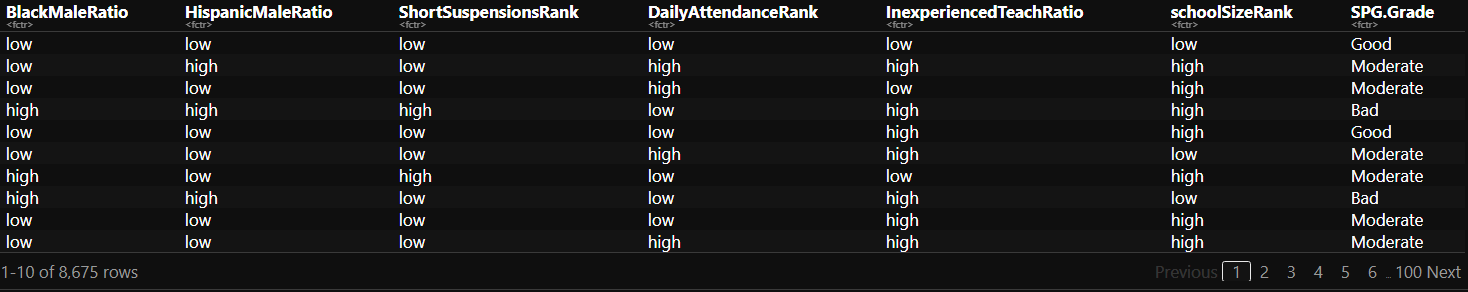

In [4]:
Image("img/data_raw.png")

And here is the code used to generate the association rules:

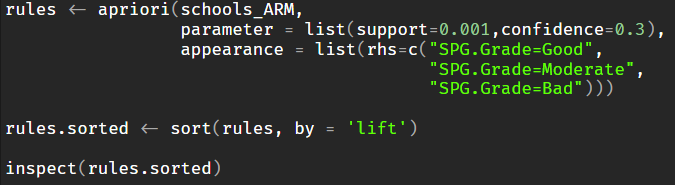

In [6]:
Image("img/code.png")

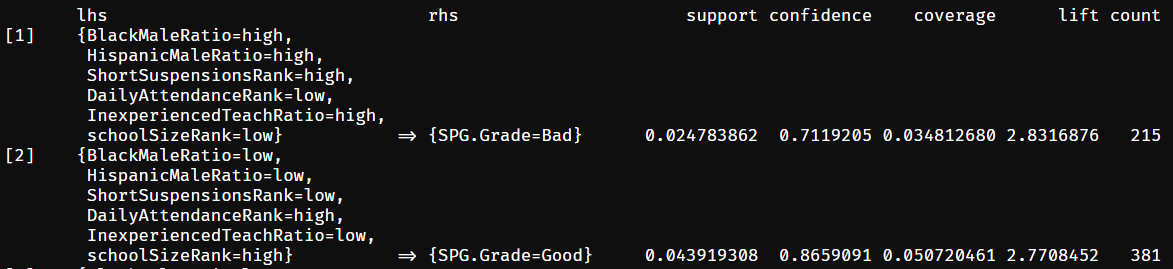

In [5]:
Image("img/rules.png")

The first two rules are striking. Taking them at face value, one might conclude that less diversity, coupled with improvements in teacher experience, suspensions, and attendance would improve school performance. But is that really the case? These results motivated us to dig a little bit deeper and see if schools with highly diverse populations are improved to performance levels of less diverse schools when attendance, suspension rates, and teacher experience are improved. 

To accomplish this, we aggregated the data in a similar fashion to "matching" techniques used in clinical trials (https://en.wikipedia.org/wiki/Matching_(statistics)). That is, we grouped schools with similar features and looked at the composition of school performance. We then looked at another group of schools with exactly the same features as the first, but with one different aspect (better attendance, lower suspension rate, etc.), and compared the performance composition. The analyses were run separately for small and large schools. The comparison groups are as follows:

## Control Group

* Black Male Ratio = 'high'

* Hispanic Male Ratio = 'high' 

* Short Suspension Rank = 'high'

* Daily Attendance Rank = 'low'

* Inexperienced Teacher Ratio = 'high'

## Increased Teacher Experience Only Group

* Black Male Ratio = 'high'

* Hispanic Male Ratio = 'high' 

* Short Suspension Rank = 'high'

* Daily Attendance Rank = 'low'

* Inexperienced Teacher Ratio = 'low'

## Increased Attendance Only Group

* Black Male Ratio = 'high'

* Hispanic Male Ratio = 'high' 

* Short Suspension Rank = 'high'

* Daily Attendance Rank = 'high'

* Inexperienced Teacher Ratio = 'high'

## Lowered Suspension Only Group

* Black Male Ratio = 'high'

* Hispanic Male Ratio = 'high' 

* Short Suspension Rank = 'low'

* Daily Attendance Rank = 'low'

* Inexperienced Teacher Ratio = 'high'

## All Three Improvements Group

* Black Male Ratio = 'high'

* Hispanic Male Ratio = 'high' 

* Short Suspension Rank = 'low'

* Daily Attendance Rank = 'high'

* Inexperienced Teacher Ratio = 'low'

Below are the results we observed after running the analysis:


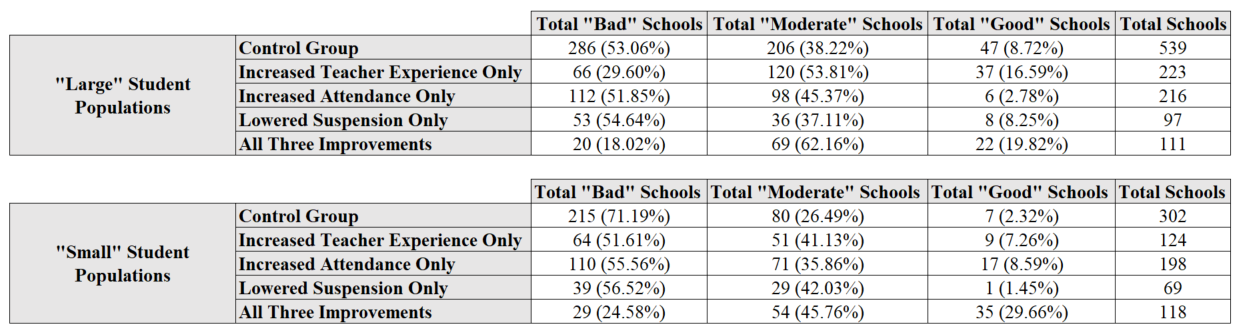

In [3]:
Image("img/tables.png")

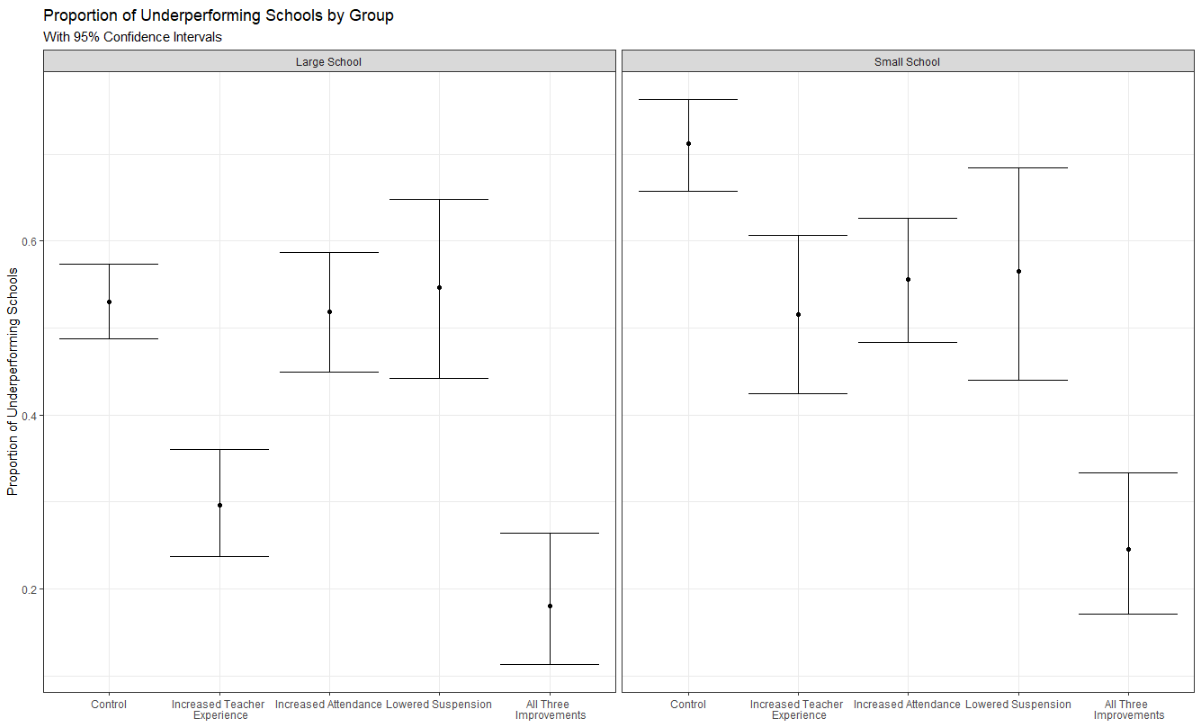

In [7]:
Image("img/graph.png")

# Conclusions

From the figures above, it is apparent that in schools with highly diverse student populations, increased teacher experience and increased attendance improve the overall quality of the school. The point about teacher experience is particularly interesting, given that it is mostly inner-city (read: diverse) schools are partners in programs such as Teach for America, which place recent college grads in teaching positions. Perhaps this analysis shows a net-negative effect of such programs, and a need for more experienced educators in diverse classrooms. While we cannot make any causal claims on this topic, further investigation is certainly merited.

Given the wide confidence intervals and the discrepancy in effect between large and small schools, it appears that reducing suspensions does not necessarily improve school quality on its own. Furthermore, the question of what we can infer from the statistic is a little fuzzy. Are we saying that reducing suspensions will lead to school performance improvements? Or are we saying that replacing suspensions with another form of disciplinary action will lead to improvements? Further research is needed here.

One final observation is the synergistic effect of all three improvements. In the "all three improvements" group, we see dramatic improvement in school performance. It appears that, holding everything else constant, improving attendance, lowering suspensions, and increasing teacher experience together make for a better school.